# Probabilidade

É difícil fazer ciência dos dados sem algum tipo de entendimento de probabilidade e sua matemática. Assim como no nosso tratamento de estatísticas na aula anterior, vamos ser mais breve do que o tópico merece e eliminar muitos dos detalhes técnicos.

Para nossos propósitos, você deve pensar em probabilidade como uma forma de quantificar a incerteza associada a eventos escolhidos de um universo de eventos. Em vez de obter informações técnicas sobre o significado desses termos, pense no rolar de um dado. O universo consiste em todos os resultados possíveis. E qualquer subconjunto desses resultados é um evento; por exemplo, "o dado rola um" ou "o dado rola um número par".

Como notação, escrevemos $P(E)$ para significar "a probabilidade do evento E."

Nós usaremos a teoria da probabilidade para construir modelos. Nós usaremos a teoria da probabilidade para avaliar modelos. Nós vamos usar a teoria da probabilidade em todo o lugar.

Poderíamos, se assim desejássemos, aprofundar-nos na filosofia do que a teoria da probabilidade significa. (Isso é feito melhor com cerveja). Não faremos isso.

## Dependência e Independência

À grosso modo, dizemos que dois eventos $E$ e $F$ são dependentes se ao sabermos algo sobre se E aconteceu nos dá informações sobre se F acontece (e vice-versa). Caso contrário, eles são independentes.

Por exemplo, se virarmos uma moeda justa duas vezes, saber se o primeiro lançamento é "Cara" não nos dá nenhuma informação sobre se o segundo lançamento é "Coroa". Esses eventos são independentes. Por outro lado, saber se o primeiro lançamento é "Cara" certamente nos dá informações sobre se ambos os lançamentos são "Coroa". (Se o primeiro lançamento é "Cara", então definitivamente não é o caso de ambas as viradas serem "Coroa".) Esses dois eventos são dependentes.

Matematicamente, dizemos que dois eventos $E$ e $F$ são independentes se a probabilidade de ambos acontecerem é o produto das probabilidades que cada um acontece:

$P(E,F) = P(E)P(F)$

No exemplo acima, a probabilidade de "primeiro dar Cara" é $1/2$, e a probabilidade de "ambos darem Coroa" é $1/4$, mas a probabilidade de "primeiro dar Cara" e "ambos darem Coroa" é 0.

## Probabilidade Condicional

Quando dois eventos $E$ e $F$ são independentes, então, por definição, temos:

$P(E,F) = P(E)P(F)$

Se eles não são necessariamente independentes (e se a probabilidade de $F$ não é zero), então definimos a probabilidade de $E$ "condicional em F" como:

$P(E|F) = \frac{P(E)}{P(F)}$

Você deve pensar nisso como a probabilidade de que $E$ aconteça, dado que sabemos que $F$ acontece. Nós frequentemente reescrevemos isso como:

$P(E,F) = P(E|F)P(F)$

E quando $E$ e $F$ são independentes, você pode verificar que:

$P(E|F) = P(E)$

que é a maneira matemática de expressar que saber que $F$ ocorreu não nos dá nenhuma informação adicional sobre se $E$ ocorreu.

Um exemplo complicado comum envolve uma família com dois filhos de sexo desconhecido.

Se assumirmos que:
1. Cada criança tem a mesma probabilidade de ser um menino ou uma menina;
2. O sexo do segundo filho é independente do sexo do primeiro filho, então o evento "sem meninas" tem probabilidade de $1/4$, o evento "uma menina, um menino" tem probabilidade $1/2$ e o evento "duas meninas" tem probabilidade $1/4$.

Agora podemos perguntar: qual é a probabilidade do evento "ambas as crianças são meninas" ($B$) condicional ao evento "a criança mais velha é uma menina" ($G$)? Usando a definição de probabilidade condicional:

$P(B|G) = \frac{P(B,G)}{P(G)} = \frac{P(B)}{P(G)} = 1/2$

já que o evento $B$ e $G$, ou $(B,G)$ ("as duas crianças são meninas *e* a mais velha é uma menina") é apenas o evento $B$. (Uma vez que você sabe que as duas crianças são meninas, é necessariamente verdade que a criança mais velha é uma menina.)

Muito provavelmente este resultado está de acordo com a sua intuição.

Poderíamos também perguntar sobre a probabilidade do evento "ambas as crianças serem meninas" ($B$) condicionadas ao evento "pelo menos uma das crianças é uma menina" $(L)$. Surpreendentemente, a resposta é diferente de antes!

Como antes, o evento $B$ e $L$, ou $(B,L)$, ("as duas crianças são meninas *e* pelo menos uma das crianças é uma menina") é apenas o evento $B$. Por que? Ora, se as duas crianças são meninas, então pelo menos uma é menina. Sabemos que a probabilidade do evento $B$ é $1/4$. Qual é a probabilidade do evento $L$? Seja $F$ e $M$ os sexos das crianças, o universo de possibilidades é:

$(F, F), (F, M), (M, F), (M, M)$,

ou seja, apenas uma das quatro possibilidades não está em $L$, que tem probabilidade de $3/4$.

Assim:

$P(B|L) = P(B,L)/P(L) = P(B)/P(L) = \frac{1/4}{3/4} = 1/3$

Em suma, se tudo o que você sabe é que pelo menos uma das crianças é uma menina, então é duas vezes mais provável que a família tenha um menino e uma menina do que tenha duas garotas.

Podemos verificar isso "gerando" muitas famílias:

In [1]:
import random

def random_kid():
    return random.choice(["boy", "girl"])

both_girls = 0
older_girl = 0
either_girl = 0
random.seed(0)
for _ in range(10000):
    younger = random_kid()
    older = random_kid()
    if older == "girl":
        older_girl += 1
    if older == "girl" and younger == "girl":
        both_girls += 1
    if older == "girl" or younger == "girl":
        either_girl += 1

print ("P(both | older):", both_girls / older_girl)
print ("P(both | either): ", both_girls / either_girl)


P(both | older): 0.5007089325501317
P(both | either):  0.3311897106109325


Outro exemplo interessante, que foge confunde um pouco no uso da probabilidade condicional, é o [Problema de Monty Hall](https://pt.wikipedia.org/wiki/Problema_de_Monty_Hall), que ficou popular no Brasil a partir do quadro [A Porta dos Desesperados](https://www.youtube.com/watch?v=VCPBvKYqm5U) apresentado pelo humorista Sérgio Mallandro. Nesse quadro, o participante tinha que escolher uma de três portas para abrir. Em uma delas há um prêmio, nas outras duas um monstro. Depois de feita a escolha da porta inicial, o apresentador abre uma das duas portas que não foram escolhidas pelo participante e oferece a ele a chance de trocar a sua escolha inicial pela outra porta. O que ele deve fazer?

Seja o evento $A$ o prêmio e o evento $B$ o monstro, qual a probabilidade da escolha inicial do participante ser o prêmio?

$P(A) = 1/3$

E de ser o monstro?

$P(B) = 1 - P(A) = 2/3$

Depois que o apresentador revela um monstro em uma das portas restantes, qual a probabilidade da que restou ser a porta do prêmio? Note que o apresentador irá, necessariamente, revelar uma porta com um monstro. Então, o jogo na verdade é outro: o prêmio pode estar na escolha inicial do participante ou nas duas portas que restam ao apresentador. E qual a probabilidade do prêmio estar em uma das duas portas que restaram para o apresentador? A mesma probabilidade do prêmio não estar na porta escolhida inicialmente pelo participante, que é de $2/3$. Assim, o participante, se quiser aumentar as chances de ganhar o prêmio, deve ser optar por trocar a sua escolha pela porta restante do apresentador.

Se você ainda está com dúvidas, pense no mesmo problema, mas com 1000 portas, em que o participante escolhe uma delas inicialmente e o apresentador elimina todas as outras e deixa apenas uma. O apresentador não funciona como a sorte, ele vai, *com certeza*, eliminar portas que contenham monstros.

## Teorema de Bayes

Um dos melhores amigos do cientista de dados é o Teorema de Bayes, que é uma maneira de "inverter" as probabilidades condicionais. Digamos que precisamos saber a probabilidade de algum evento $E$ ocorrer condicionado a ocorrência de algum outro evento $F$. O problema é que nós só temos informações sobre a probabilidade de $F$ condicional a $E$ ocorrer. Usando a definição de probabilidade condicional duas vezes, temos que:

$P(E|F) = \frac{P(E,F)}{P(F)} = \frac{P(F|E)P(E)}{P(F)}$

O evento $F$ pode ser dividido em dois eventos mutualmente exclusivos "$F$ e $E$" e "$F$ e não $E$". Se a gente escrever $\neg E$ para "não $E$" (isto é, "$E$ não ocorre"), então:

$P(F) = P(F,E) + P(F,\neg E)$

tal que:

$P(E|F) = \frac{P(F|E)P(E)}{P(F|E)P(E) + P(F|\neg E)P(\neg E)}$, 

que é como o Teorema de Bayes é normalmente descrito.

Este teorema costuma ser usado para demonstrar por que os cientistas de dados são mais inteligentes que os médicos. Imagine uma certa doença que afeta 1 em cada 10.000 pessoas. E imagine que há um teste para esta doença que dá o resultado correto ("doente" se você tem a doença, "não-doente" se você não o tem) 99% do das vezes.

O que significa um teste positivo? Vamos usar $T$ para o evento "seu teste é positivo" e $D$ para o evento "você tem a doença". Então, o Teorema de Bayes diz que a probabilidade de você ter a doença, condicionada a testes positivos, é:

$P(D|T) = \frac{P(T|D)P(D)}{P(T|D)P(D) + P(T|¬D)P(¬D)}$

Sabemos que $P(T|D)$, a probabilidade de que alguém com a doença seja positiva, é $0.99$. $P(D)$, a probabilidade de que qualquer pessoa tenha a doença, é $1/10000 = 0.0001$. $P(T|\neg D)$, a probabilidade de que alguém sem a doença seja positiva, é de $0.01$. E $P(\neg D)$, a probabilidade de que qualquer pessoa não tenha a doença é de $0.9999$. Se você substituir esses números no Teorema de Bayes, você encontrará

$P(D|T) = 0.98\%$

Ou seja, menos de 1% das pessoas que testam positivo realmente têm a doença.

Isso pressupõe que as pessoas façam o teste mais ou menos ao acaso. Se apenas as pessoas com certos sintomas fizessem o teste, teríamos que condicionar o evento “teste e sintomas positivos” e o número provavelmente seria muito maior.

Embora esse seja um cálculo simples para um cientista de dados, a maioria dos médicos adivinhará que $P(D|T)$ é de aproximadamente $1$.

Uma maneira mais intuitiva de ver isso é imaginar uma população de 1 milhão de pessoas. Você esperaria que 100 deles tivessem a doença e 99 desses 100 tivessem um teste positivo. Por outro lado, você esperaria que 999.900 deles não tivessem a doença e 9.999 deles tivessem um teste positivo. O que significa que você espera que apenas 99 de (99 + 9999) testadores positivos realmente tenham a doença.

## Variáveis aleatórias

Uma variável aleatória é uma variável cujos valores possíveis têm uma distribuição de probabilidade associada. Uma variável aleatória muito simples é igual a $1$ se um lançamento de moeda der "cara" e $0$ se der "coroa". Uma variável mais complicada poderia medir o número de "caras" observadas quando uma moeda é lançada $10$ vezes ou um valor é escolhido no `range(10)`, em que cada número é igualmente provável.

A distribuição associada fornece as probabilidades de que a variável receba cada um dos seus valores possíveis. A variável *lançamento de moeda* é igual a $0$ com probabilidade $0.5$ e $1$ com probabilidade $0.5$. A variável do `range(10)` tem uma distribuição que atribui a probabilidade $0.1$ a cada um dos números de $0$ a $9$.

Falaremos às vezes sobre o valor esperado de uma variável aleatória, que é a média de seus valores ponderados por suas probabilidades. A variável *lançamento de moeda* tem um valor esperado de 

$E($ *lançamento de moeda* $) = 1/2 = 0 \times 1/2 + 1 \times 1/2$,

enquanto a variável aleatória `range(10)` tem um valor esperado de

$E($ `range(10)` $) = 4.5 = \sum _{i=0}^{9}{(i \times 0.1)}$.

Variáveis aleatórias podem ser *condicionadas* a eventos, assim como podem outros eventos. Voltando ao exemplo dos dois filhos, mencionado anteriormente, se $X$ for a variável aleatória que representa o número de garotas, $X$ será igual a $0$ com probabilidade $1/4$, $1$ com probabilidade $1/2$ e $2$ com probabilidade $1/4$.

Podemos definir uma nova variável aleatória $Y$ que dá o número de meninas condicionado a pelo menos uma das crianças ser uma menina. Então $Y$ é igual a $1$ com probabilidade $2/3$ e $2$ com probabilidade $1/3$. Uma variável $Z$, que é o número de garotas condicionado a criança mais velha ser uma garota é igual a $1$ com probabilidade $1/2$ e $2$ com probabilidade $1/2$.

Na maioria das vezes, estaremos usando variáveis aleatórias implicitamente naquilo que fazemos sem chamar atenção especial a elas. Mas se você olhar profundamente, verá.

## Distribuições Contínuas

Um *lançamento de moeda* corresponde a uma distribuição discreta - uma que associa probabilidade positiva a resultados discretos. Frequentemente, queremos modelar distribuições em um contínuo de resultados. (Para nossos objetivos, esses resultados sempre serão números reais, embora isso nem sempre seja o caso na vida real.) Por exemplo, a distribuição uniforme coloca peso igual em todos os números entre 0 e 1.

Como há infinitos números entre 0 e 1, isso significa que o peso atribuído a pontos individuais deve ser necessariamente zero. Por esta razão, nós representamos uma distribuição contínua com uma *função de densidade de probabilidade*, ou *probability density function (pdf)*, de modo que a probabilidade de ver um valor em um determinado intervalo seja igual à integral da função de densidade durante o intervalo.

Se seu cálculo integral estiver enferrujado, uma maneira mais simples de entender isso é que, se uma distribuição tiver a função densidade $f$, a probabilidade de ver um valor entre $x$ e $x + h$ é aproximadamente $h \times f(x)$ se $h$ for pequeno.

A função de densidade para a distribuição uniforme é simplesmente:

In [2]:
def uniform_pdf(x):
    return 1 if x >= 0 and x < 1 else 0

A probabilidade de que uma variável aleatória que siga essa distribuição esteja entre $0.2$ e $0.3$ é de $1/10$, como você esperaria. O `random.random()` do Python é uma variável (pseudo) aleatória com uma densidade uniforme.

Frequentemente estaremos mais interessados na *função de distribuição cumulativa*, ou *cumulative distribution function* (cdf), que fornece a probabilidade de que uma variável aleatória seja menor ou igual a um determinado valor. Não é difícil criar a função de distribuição cumulativa para a distribuição uniforme:

In [3]:
def uniform_cdf(x):
    "returns the probability that a uniform random variable is <= x"
    if x < 0: return 0 # uniform random is never less than 0
    elif x < 1: return x # e.g. P(X <= 0.4) = 0.4
    else: return 1 # uniform random is always less than 1

In [4]:
matplotlib inline

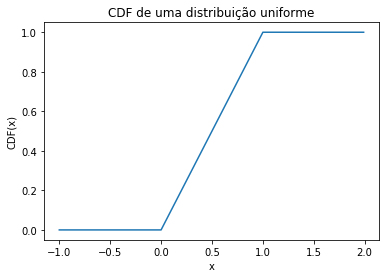

In [5]:
from matplotlib import pyplot as plt
import numpy as np

x = np.arange(-1, 2.0, 0.01)
cdf_x = [uniform_cdf(i) for i in x]
# cria um gráfico de linhas, com os anos no eixo x e o pib no eixo y
plt.plot(x, cdf_x, linestyle='solid')

plt.title("CDF de uma distribuição uniforme")
plt.ylabel("CDF(x)")
plt.xlabel("x")

plt.show()

## A distribuição normal

A distribuição normal é a rainha das distribuições. É a clássica distribuição da curva em forma de sino e é completamente determinada por dois parâmetros: sua média $\mu$ (mu) e seu desvio padrão $\sigma$ (sigma). A média indica onde o sino está centrado e o desvio padrão indica o quão "largo" ele é. A sua função de distribuição é:

$$ f(x\mid \mu ,\sigma ^{2})={\frac {1}{\sqrt {2\pi \sigma ^{2}}}}e^{-{\frac {(x-\mu )^{2}}{2\sigma ^{2}}}}, $$

que pode ser implementada como:

In [6]:
import math

In [7]:
def normal_pdf(x, mu=0, sigma=1):
    sqrt_two_pi = math.sqrt(2 * math.pi)
    return (math.exp(-(x-mu) ** 2 / 2 / sigma ** 2) / (sqrt_two_pi * sigma))

A seguir, plotamos algumas dessas PDFs para ver como eles se parecem:

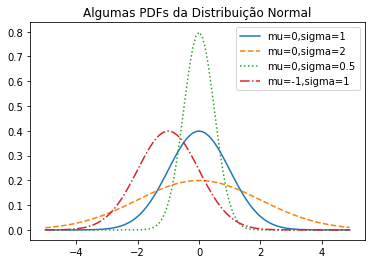

In [8]:
xs = [x / 10.0 for x in range(-50, 50)]
plt.plot(xs,[normal_pdf(x,sigma=1) for x in xs],'-',label='mu=0,sigma=1')
plt.plot(xs,[normal_pdf(x,sigma=2) for x in xs],'--',label='mu=0,sigma=2')
plt.plot(xs,[normal_pdf(x,sigma=0.5) for x in xs],':',label='mu=0,sigma=0.5')
plt.plot(xs,[normal_pdf(x,mu=-1) for x in xs],'-.',label='mu=-1,sigma=1')
plt.legend()
plt.title("Algumas PDFs da Distribuição Normal")
plt.show()

Quando $\mu = 0$ e $\sigma = 1$, a distribuição é chamada de distribuição normal padrão. Se $Z$ é uma variável aleatória normal padrão, então acontece que:

$X = \sigma Z + \mu$

também é normal, mas com média $\mu$ e desvio padrão $\sigma$. Inversamente, se $X$ é uma variável aleatória normal com média $\mu$ e desvio padrão $\sigma$,

$Z = (X-\mu)/\sigma$

é uma variável normal padrão.

A função de distribuição cumulativa para a distribuição normal não pode ser escrita de maneira "elementar". Ela é definida como:

$$F(x)=\Phi \left({\frac {x-\mu }{\sigma }}\right)={\frac {1}{2}}\left[1+\operatorname {erf} \left({\frac {x-\mu }{\sigma {\sqrt {2}}}}\right)\right],$$

em que

$$\Phi (x)={\frac {1}{2}}\left[1+\operatorname {erf} \left({\frac {x}{\sqrt {2}}}\right)\right]$$

e

$$\operatorname {erf} (x)={\frac {2}{\sqrt {\pi }}}\int _{0}^{x}e^{-t^{2}}\,dt$$

Neste curso, não nos preocuparemos muito sobre os detalhes dessas funções. Se quiser saber mais sobre elas, clique [aqui](https://pt.wikipedia.org/wiki/Distribui%C3%A7%C3%A3o_normal) ou [aqui](https://pt.wikipedia.org/wiki/Fun%C3%A7%C3%A3o_erro). Em Python, podemos escrevê-la usando diretamente o `math.erf`:

In [9]:
def normal_cdf(x, mu=0,sigma=1):
    return (1 + math.erf((x - mu) / math.sqrt(2) / sigma)) / 2

Abaixo plotamos algumas CDFs de distribuições normais:

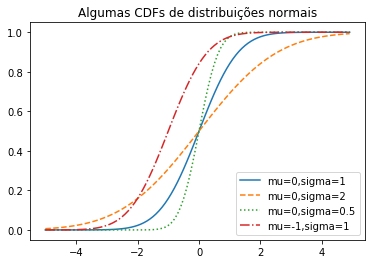

In [10]:
xs = [x / 10.0 for x in range(-50, 50)]
plt.plot(xs,[normal_cdf(x,sigma=1) for x in xs],'-',label='mu=0,sigma=1')
plt.plot(xs,[normal_cdf(x,sigma=2) for x in xs],'--',label='mu=0,sigma=2')
plt.plot(xs,[normal_cdf(x,sigma=0.5) for x in xs],':',label='mu=0,sigma=0.5')
plt.plot(xs,[normal_cdf(x,mu=-1) for x in xs],'-.',label='mu=-1,sigma=1')
plt.legend(loc=4) # bottom right
plt.title("Algumas CDFs de distribuições normais")
plt.show()

Às vezes, precisamos inverter a `normal_cdf` para encontrar o valor correspondente a uma probabilidade especificada. O inverso da CDF da distribuição normal é:

$$F^{-1}(x) =\mu +\sigma {\sqrt {2}}\mathrm {erf} ^{-1}(2p-1),\quad p\in (0,1)$$

[Não há uma maneira simples de calcular o inverso da funçao *erf*](https://stackoverflow.com/questions/42381244/pure-python-inverse-error-function), mas como a `normal_cdf` é contínua e estritamente crescente, podemos usar uma pesquisa binária:

In [11]:
def inverse_normal_cdf(p, mu=0, sigma=1, tolerance=0.00001):
    """find approximate inverse using binary search"""
    # if not standard, compute standard and rescale
    if mu != 0 or sigma != 1:
        return mu + sigma * inverse_normal_cdf(p, tolerance=tolerance)
    
    low_z, low_p = -10.0, 0 # normal_cdf(-10) is (very close to) 0
    hi_z, hi_p = 10.0, 1 # normal_cdf(10) is (very close to) 1
    while hi_z - low_z > tolerance:
        mid_z = (low_z + hi_z) / 2 # consider the midpoint
        mid_p = normal_cdf(mid_z) # and the cdf's value there
        if mid_p < p:
            # midpoint is still too low, search above it
            low_z, low_p = mid_z, mid_p
        elif mid_p > p:
            # midpoint is still too high, search below it
            hi_z, hi_p = mid_z, mid_p
        else:
            break
    return mid_z    

Se preferir, pode usar também a fórmula fechada usando a função `erfinv` do `scipy`:

In [12]:
from scipy.special import erfinv

def inverse_normal_cdf(p, mu=0, sigma=1):
    return mu + sigma*math.sqrt(2)*erfinv(2*p - 1)

In [13]:
print(inverse_normal_cdf(0.23, 10, 2))

8.522306301629573


A função divide os intervalos repetidamente até se aproximar de um $Z$ próximo o suficiente da probabilidade desejada. 

## O Teorema Central do Limite

Uma razão pela qual a distribuição normal é tão útil é o teorema central do limite, que diz (em essência) que uma variável aleatória definida como a média de um grande número de variáveis aleatórias independentes e identicamente distribuídas é aproximadamente distribuída normalmente.

Em particular, se $x_1, ..., x_n$ são variáveis aleatórias com média $\mu$ (finita),desvio padrão $\sigma$ (finito), identicamente distribuídas, e se $n$ é grande, então

$$\frac{1}{n}(x_1 + \cdots + x_n)$$

é aproximadamente distribuído por uma Normal com média $\mu$ e desvio padrão $\sigma/\sqrt{n}$. De forma equivalente (mas muitas vezes mais útil), 

$$\frac{(x_1 + \cdots + x_n) - \mu n}{\sigma\sqrt{n}}$$

é aproximadamente distribuído normalmente com média 0 e desvio padrão 1.

Uma maneira fácil de ilustrar isso é observando as variáveis aleatórias binomiais, que possuem dois parâmetros $n$ e $p$. Uma variável aleatória Binomial($n, p$) é simplesmente a soma de $n$ variáveis aleatórias independentes de Bernoulli($p$), cada uma delas igual a $1$ com probabilidade $p$ e $0$ com probabilidade $1 - p$:

In [14]:
def bernoulli_trial(p):
    return 1 if random.random() < p else 0

def binomial(n, p):
    return sum(bernoulli_trial(p) for _ in range(n))

A média de uma variável de Bernoulli($p$) é $p$, e seu desvio padrão é $\sqrt{p(1 - p)}$. O teorema central do limite diz que quando $n$ se torna grande, uma variável Binomial($n, p$) é aproximadamente uma variável aleatória normal com média $\mu = np$ e desvio padrão $\sigma = \sqrt{np(1 - p)}$. Se plotarmos ambos, você pode facilmente ver a semelhança:

In [15]:
from collections import Counter

def make_hist(p, n, num_points):
    data = [binomial(n, p) for _ in range(num_points)]

    # use um gráfico de barras para mostra a distribuição das amostras da Binomial
    histogram = Counter(data)
    plt.bar([x - 0.4 for x in histogram.keys()],
            [v / num_points for v in histogram.values()],
            0.8,
            color='0.75')
    mu = p * n
    sigma = math.sqrt(n * p * (1 - p))
    
    # use um gráfico de linhas para mostrar a aproximiação normal
    xs = range(min(data), max(data) + 1)
    
    #voce pode escolher a aproximação pela CDF ou pela PDF
    ys_cdf = [normal_cdf(i + 0.5, mu, sigma) - normal_cdf(i - 0.5, mu, sigma) 
          for i in xs]
    ys_pdf = [normal_pdf(i, mu, sigma) for i in xs]    
    plt.plot(xs,ys_cdf, color="red", linestyle=':', linewidth=4)
    plt.plot(xs,ys_pdf, color="blue", linestyle='--')
    plt.title("Distribuição Binomial vs. Aproximação Normal")
    plt.show()

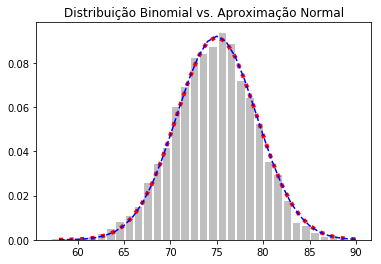

In [16]:
make_hist(0.75, 100, 10000)

A moral dessa aproximação é que, se você quiser saber a probabilidade de que (digamos) uma moeda justa apresente mais de $60$ "caras" em $100$ viradas, você pode estimar como a probabilidade de que uma Normal($50,5$) seja maior que $60$, que é mais fácil do que computar a CDF ou PDF da Binomial($100,0.5$). (Embora na maioria dos aplicativos você provavelmente usasse um software estatístico que computasse de bom grado todas as probabilidades que você quisesse.)

## Distribuições com cauda pesada



Às vezes, é útil estudar a questão oposta da **CDF**, ou $F(x)$, e perguntar com que frequência a variável aleatória está acima de um determinado nível. Isso é chamado de função de *distribuição cumulativa complementar* (**CCDF**) ${\bar {F}}(x)$, ou simplesmente a distribuição ou excedência da cauda, sendo definida como


$${\bar {F}}(x)=\operatorname {P} (X>x)=1-F(x)$$

### Distribuição de Pareto

Se $X$ é uma variável aleatória com uma distribuição Pareto (Tipo I), então a probabilidade de que $X$ seja maior que algum número $x$ é dada por

$${\overline {F}}(x)=\Pr(X>x)={\begin{cases}\left({\frac {x_{\mathrm {m} }}{x}}\right)^{\alpha }&x\geq x_{\mathrm {m} },\\1&x<x_{\mathrm {m} },\end{cases}}$$

em que $x_m$ é o valor mínimo possível (necessariamente positivo) de $X$, e $\alpha$ é um parâmetro positivo. A distribuição de Pareto Tipo I é caracterizada por esses dois parâmetros, sendo que $x_m$ é o parâmetro de escala e $\alpha$ é o parâmetro de forma, que é conhecido como o índice de cauda. Quando esta distribuição é usada para modelar a distribuição de riqueza, então o parâmetro $\alpha$ é chamado de índice de Pareto.

O valor esperado de uma variável aleatória que segue uma distribuição de Pareto é

$$\mathrm {E} (X)={\begin{cases}\infty &\alpha \leq 1,\\{\frac {\alpha x_{\mathrm {m} }}{\alpha -1}}&\alpha >1.\end{cases}}$$

A variância de uma variável aleatória que segue uma distribuição de Pareto é

$${\mathrm {Var} (X)={\begin{cases}\infty &\alpha \in (1,2],\\\left({\frac {x_{\mathrm {m} }}{\alpha -1}}\right)^{2}{\frac {\alpha }{\alpha -2}}&\alpha >2.\end{cases}}}$$

(If $\alpha$ ≤ 2, the variance does not exist.)

## Plotando a CCDF

A melhor maneira de visualizar dados com cauda pesada é através da CCDF em escalas *loglog*. Primeiro, vamos criar uma função para gerar dados que seguem a distribuição de Pareto:

In [17]:
def sample_pareto(shape=1, moda=1, n=1):
    return (np.random.pareto(shape, n) + 1) * moda

Agora vamos gerar uma amostra a partir dessa função:

In [18]:
data = sample_pareto(1,1,10000)

Vamos agora plotar a **CCDF** desses dados. Para a nossa conveniência, já existe uma [função](https://www.statsmodels.org/dev/generated/statsmodels.distributions.empirical_distribution.ECDF.html) que calcula a **CDF** de dados. A **CCDF** é, pela definição, o complemento da **CDF**, o que é muito fácil de calcular:

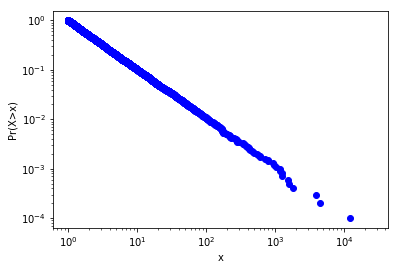

In [19]:
from statsmodels.distributions.empirical_distribution import ECDF

ecdf_data = ECDF(data)
plt.loglog(ecdf_data.x, 1-ecdf_data.y, 'bo') #1-ecdf_data.y é a CCDF
plt.xlabel('x')
plt.ylabel('Pr(X>x)')
plt.show()

Dados com essa forma existem por todo lado. Veja [este site](http://tuvalu.santafe.edu/~aaronc/powerlaws/) para maiores informações. 

O grande problema desses dados, para o teorema central dos limites, é que eles normalmente têm média e variância infinita. O que isso significa? Significa que para alguns parâmetros $\alpha$, não conseguiremos estimar a média e a variância da população a partir de amostras. Ou seja, se a população tiver média ou variância infinita, então o teorema central do limite não se aplica, ou não vai convergir para um único valor de média e variância.

Vamos testar isso.

Para isso, primeiro crie 5 grupos de amostras, com tamanhos de amostras crescentes $N = \{100, 1000, 10000, 100000, 1000000\}$. Depois, para cada tamanho de amostra $n_i \in N$, gere $100$ amostras de tamanho $n_i$ de uma distribuição de Pareto com média e variância infinita (ex: $\alpha = 0.75$) e armazene a média e a variância dessas amostras. Para facilitar, use o desvio padrão ao invés da variância.

In [20]:
from collections import defaultdict
n = [100, 1000, 10000, 100000, 1000000]
means = defaultdict(list)
variances = defaultdict(list)
for size in n:
    for i in range(100):
        s = sample_pareto(0.75, 10, size)
        means[size].append(np.mean(s))
        variances[size].append(np.std(s))

ymeans = [np.mean(means[size]) for size in n]
yvars = [np.mean(variances[size]) for size in n]

Depois, plote a média das médias e dos desvios padrões para cada grupo de amostra. 

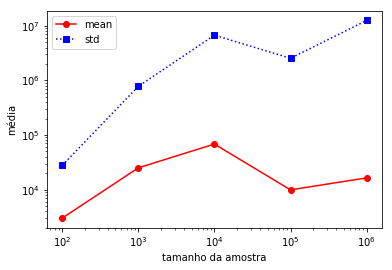

In [21]:
fig = plt.figure()
plt.loglog(n, ymeans, 'ro-', label='mean')
plt.loglog(n, yvars, 'bs:', label='std')
plt.xlabel('tamanho da amostra')
plt.ylabel('média')
plt.legend(loc=2)
plt.show()
fig.savefig('infiniteMeanAndVar.png')

Experimente plotar o histograma das médias para algum grupo de médias (ex: médias de amostras de tamanho 100).

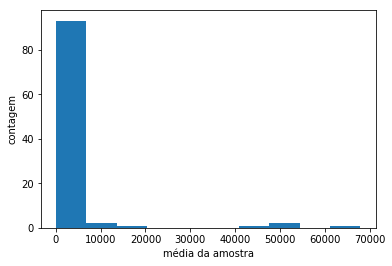

In [22]:
sample_size = 100
fig = plt.figure()
plt.hist(means[sample_size])
plt.xlabel('média da amostra')
plt.ylabel('contagem')
plt.show()
fig.savefig('meanhist' + str(sample_size) + '.png')

Como esperado, o histograma das médias é bem diferente de uma distribuição normal.

Para saber mais sobre médias e variâncias infinitas, leia [isto](https://stats.stackexchange.com/questions/94402/what-is-the-difference-between-finite-and-infinite-variance/100161).

## Para exploração futura

* `scipy.stats` contém funções *PDF* e *CDF* para a maioria das distribuições de probabilidade populares.
* Lembra-se de que eu disse que seria uma boa idéia estudar um livro de estatísticas? Também seria uma boa ideia estudar um livro de probabilidades. O melhor que eu sei que está disponível on-line é [Introdução à Probabilidade](http://www.dartmouth.edu/~chance/teaching_aids/books_articles/probability_book/amsbook.mac.pdf).
* Para brincar com o teorema central do limite, experimente [este app](http://onlinestatbook.com/stat_sim/sampling_dist/).